**Laboratorio 1 - Data Science 1**

Daniela Villamar

Carné 19086


Diego Crespo

Carné 19541

In [222]:
#Librerías necesarias para trabajar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn import preprocessing
from pandas_profiling import * 
from apyori import apriori

In [223]:
# Utilizar únicamente el train para los datos

data = pd.read_csv("train.csv") #Id como índice
data # Mostrar datos (1460 registros con 80 variables )

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Quitar la variable "Id" dado que no nos es de utilidad porque pandas tiene su propia indexación :P .

In [224]:
data = data.drop( columns= "Id") #Adios a la varaible "id"

In [225]:
data #Exito en quitar la variable 

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

# Correr esto si se desea obtener el documento de Pandas Profiling

In [226]:
#profile = ProfileReport(data, title = "Reporte Laboratorio 1", explorative = True, correlations={"cramers": {"calculate": False}}) #generamos el Codebook, le ponemos un titulo y que sea interactivo

In [227]:
#profile.to_file("ReporteLab1.html") #imprmir el HTML 

### Mostrar un poco de estadística descriptiva para las variables que tenemos (solo las numéricas)

In [228]:
data.describe() #estadística básica 

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

#### Mostramos información un poco más detallada de las variables trabajadas en la celda anterior

In [229]:
data.describe


<bound method NDFrame.describe of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0        

#### Hacemos una matriz de correlación para observar la correlación entre las variables (Solo los variables numéricas)

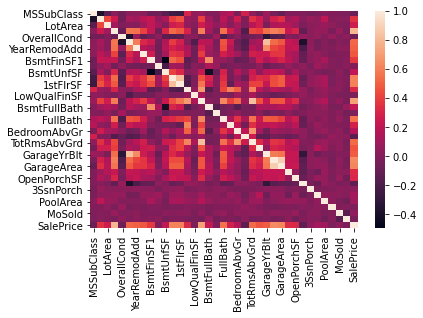

In [230]:
sns.heatmap(data.corr()) # mostramos la correlación entre las variables

### Conclusión

Podemos observar que hay variables que están bastantes correlacionadas por lo que deberemos proceder a removerlas a la hora de hacer las pruebas de esfericidad de Barlett y las pruebas $\chi^2$ y la prueba del valor p. Más adelante tendremos que hacer una limpieza más profunda de los datos, para correr las pruebas y el PCA, el análisis de factores y el algoritmo apriori.

### Observamos gráficos entre variables para ver su comportamiento, para ellos utilizamos un pairplot (incluye, gráficos de densidad, de dispersión, histogramas, entre otros).

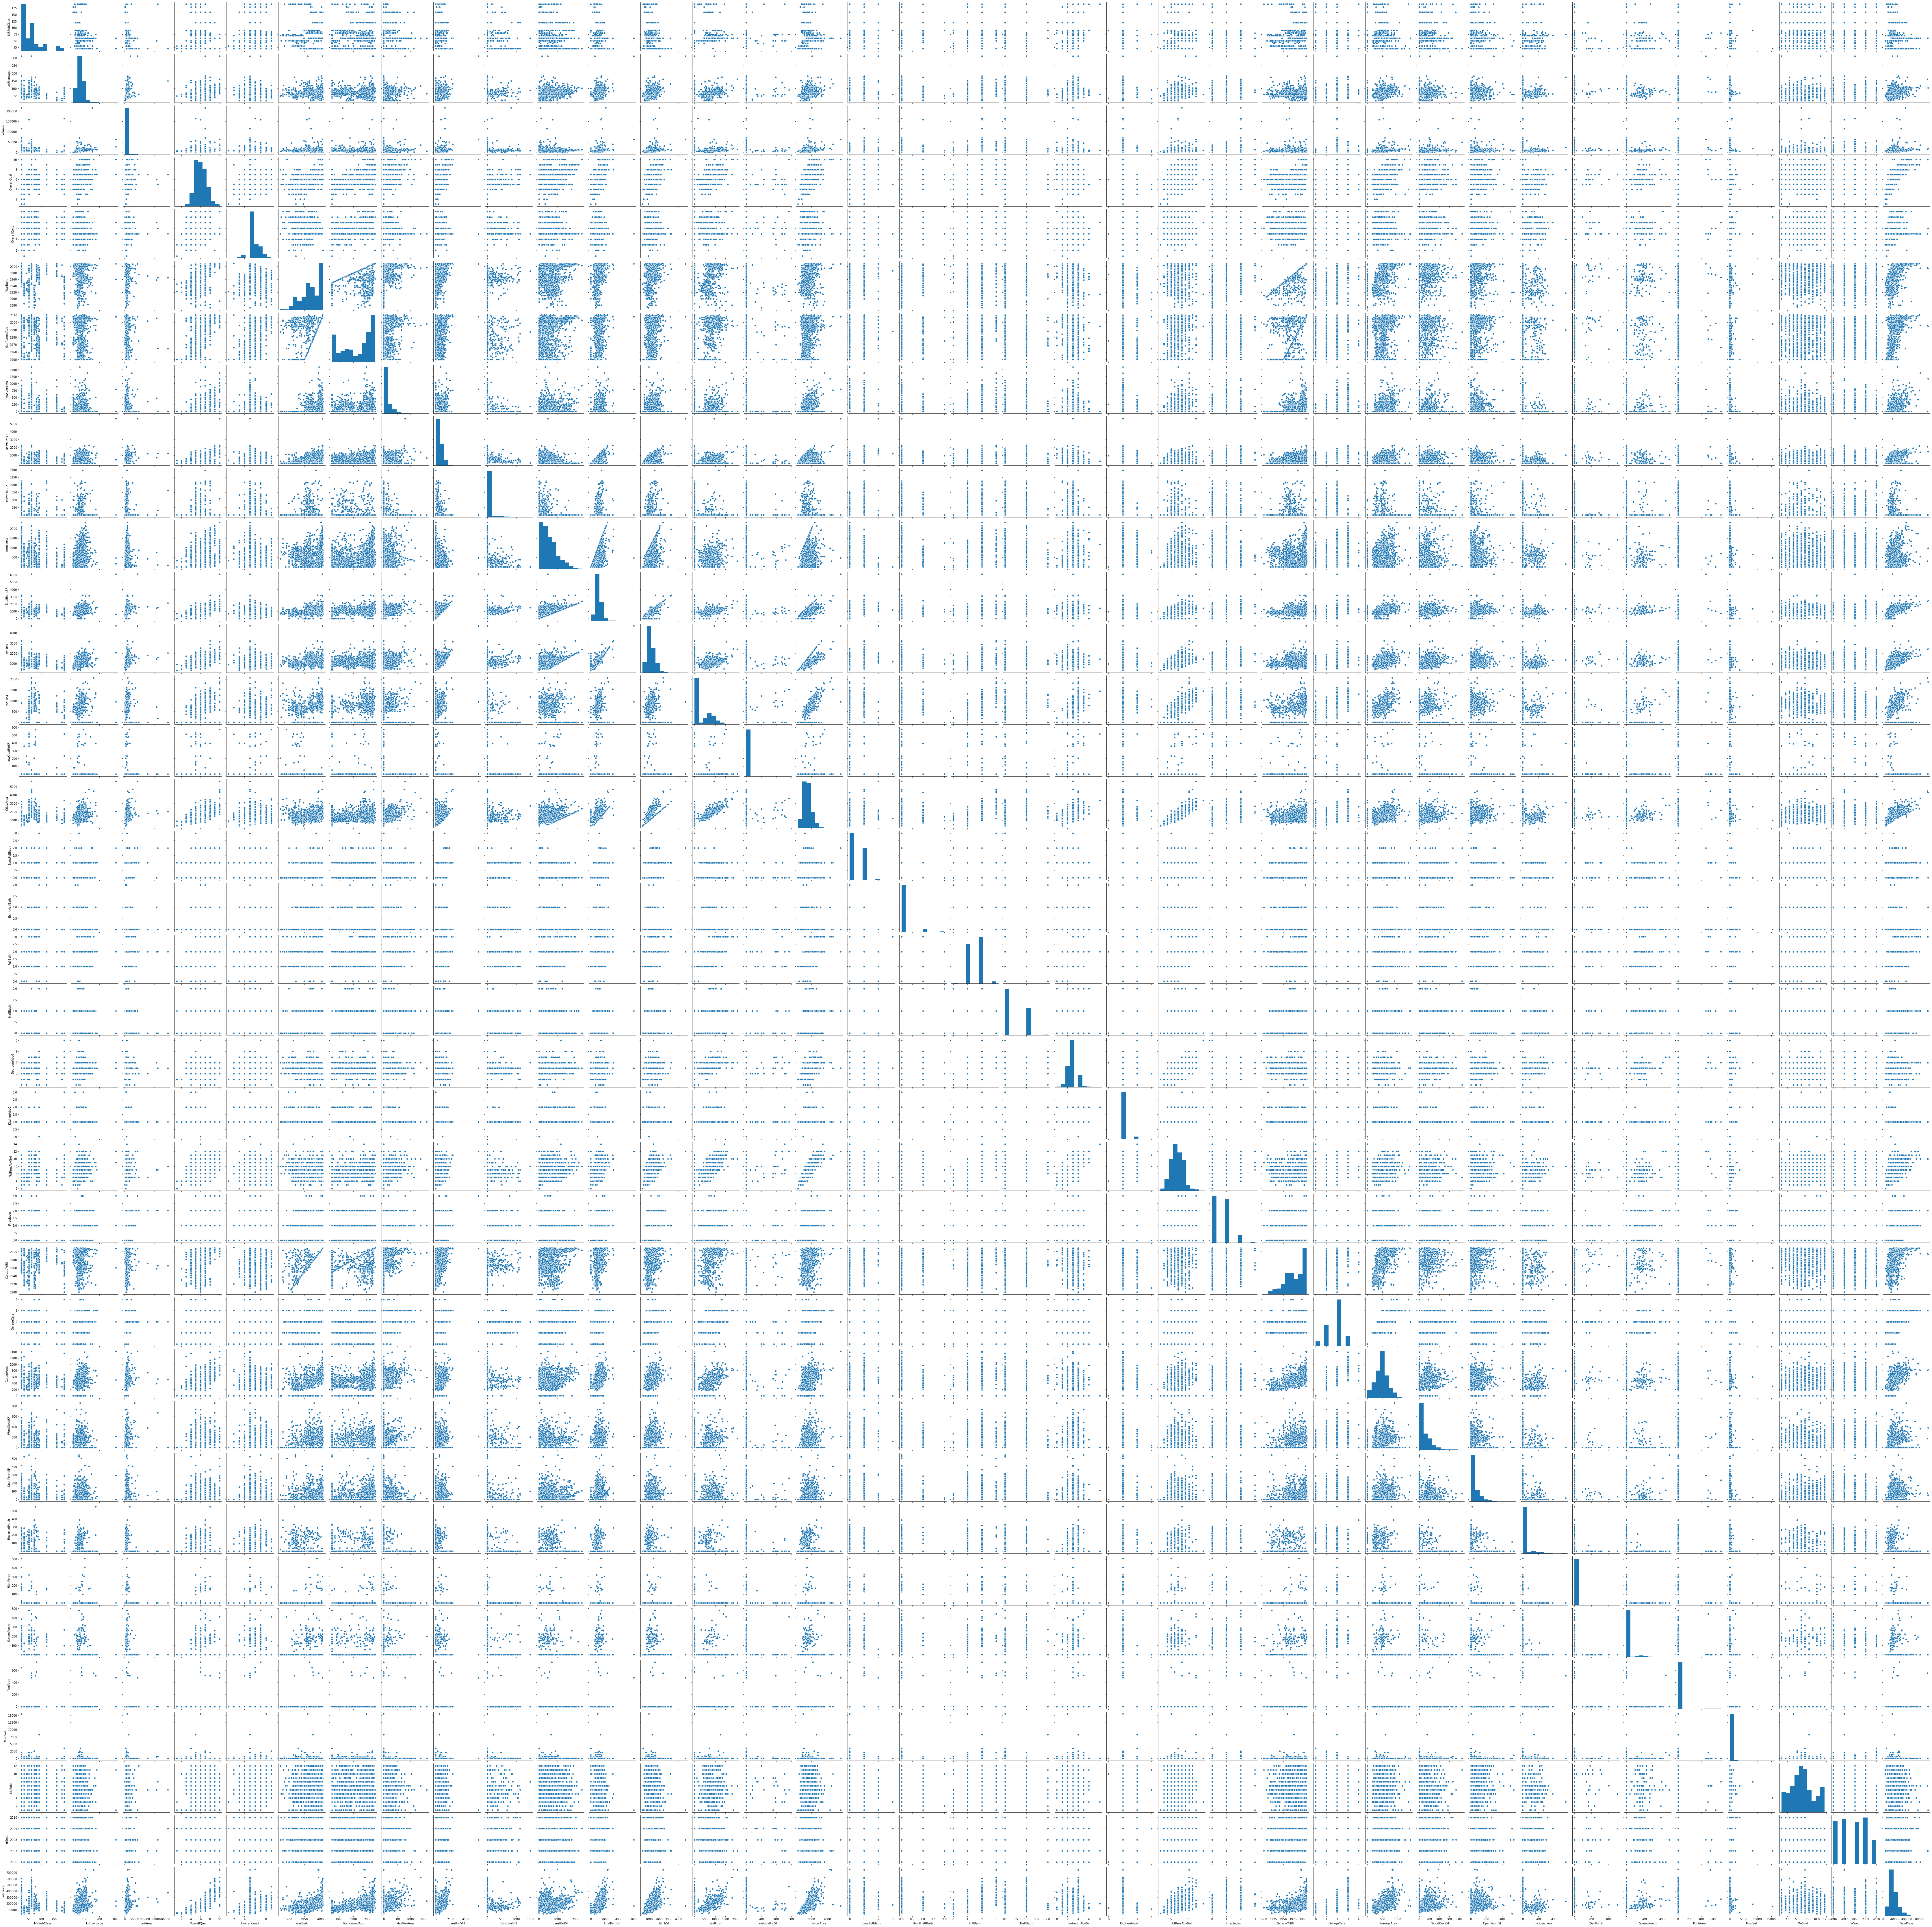

In [231]:
sns.pairplot(data)

### Definimos un par de funciones para limpiar la data

In [232]:
def generar_id(df): #función generadora de índices
    return list(range(0, len(df)))

def limpiar(df, categoria): #función que limpia los datos (numéricos) con el promedio de una categoría dada 
    prom = df[categoria].mean()
    for i in range(0, len(df)):
        if  str(df[categoria][i]) == "nan" or str(df[categoria][i]) == "NAN":
            df[categoria][i] = float(prom)

# Variables con Datos faltantes

- LotFrontage: 259 datos faltantes (rellenar con el promedio)
- MasVnrArea: 8 datos faltantes (eliminar las filas asosicadas a los dantos faltantes porque no representa más del 1% de la data total)
- GarageYrBlt: 81 faltantes (rellenar con el promedio)

In [233]:
data_limpia = data.dropna(0, subset = ["MasVnrArea"]) #removemos estos renglones
data_limpia.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1452.000000  1195.000000    1452.000000  1452.000000  1452.000000   
mean     56.949036    70.030126   10507.276171     6.092975     5.579201   
std      42.340097    24.289276    9989.563592     1.381289     1.113136   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7538.750000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11600.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1452.000000   1452.000000  1452.000000  1452.000000  1452.000000  ...   
mean   1971.116391   1984.775482   103.685262   441.970386    46.805785  ...   
std      30.193761     20.652466   181.066207   455.360279   161.726239  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1972.000000   1993.000000     0.000000   381.000000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   706.500000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1452.000000  1452.000000    1452.000000  1452.000000  1452.000000   
mean     94.416667    46.390496      21.937328     3.428375    15.143939   
std     125.393706    66.048619      61.089879    29.396943    55.899665   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1452.000000   1452.000000  1452.000000  1452.000000    1452.000000  
mean      2.774105     43.728650     6.318182  2007.815427  180615.063361  
std      40.287389    497.478278     2.699644     1.328927   79285.541485  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129900.000000  
50%       0.000000      0.000000     6.000000  2008.000000  162700.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [234]:
data_limpia.index = generar_id(data_limpia)

In [235]:
limpiar(data_limpia,"LotFrontage") #limpiamos las variables que tienen los datos faltantes :D 
limpiar(data_limpia,"GarageYrBlt")

<ipython-input-232-d7c9faf13977>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categoria][i] = float(prom)
<ipython-input-235-9ca0f393a865>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limpiar(data_limpia,"LotFrontage") #limpiamos las variables que tienen los datos faltantes :)))) 
<ipython-input-235-9ca0f393a865>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limpiar(data_limpia,"GarageYrBlt")


### Separamos las variables cuantitativas para comenzar con la visualizaciñon de dichas variables.

In [236]:
datos_cuantitativos = data.describe().columns
datos_cuantitativos 

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Boxplots

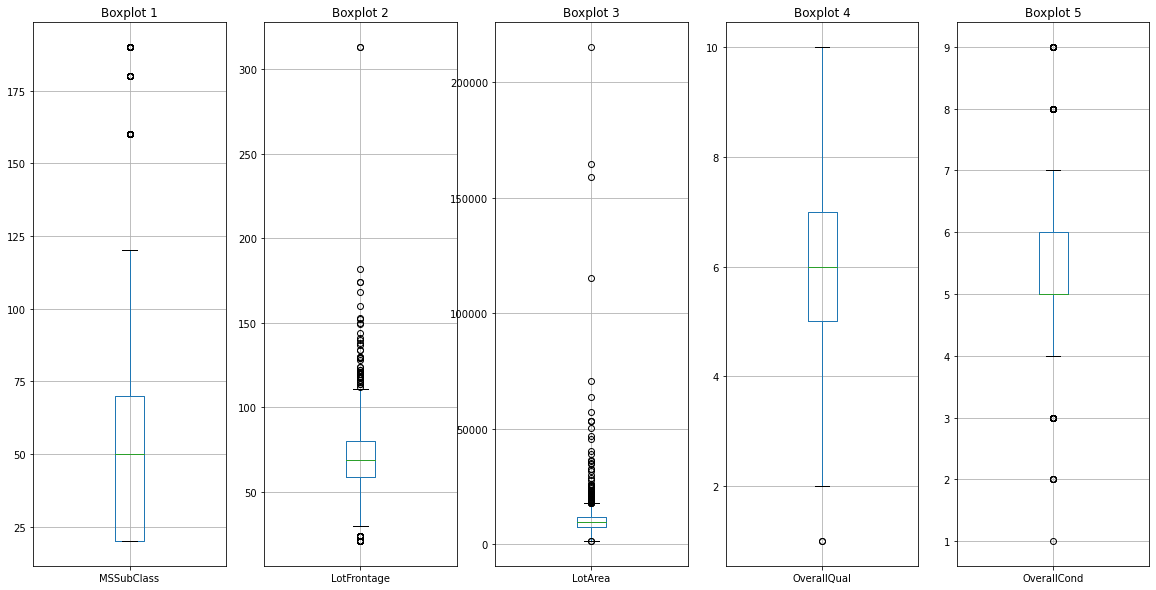

In [237]:
# Mostramos la data proyectada con ISOMAP 
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(151)
data.boxplot("MSSubClass")
ax.set_title("Boxplot 1")
ax = fig.add_subplot(152)
data.boxplot("LotFrontage")
plt.title('Boxplot 2')
ax = fig.add_subplot(153)
data.boxplot("LotArea")
ax.set_title("Boxplot 3")
ax = fig.add_subplot(154)
data.boxplot("OverallQual")
plt.title('Boxplot 4')
ax = fig.add_subplot(155)
data.boxplot("OverallCond")
plt.axis('tight')
plt.title('Boxplot 5')
plt.show()

Podemos que notar que hay variables que tienen una gran cantidad de datos atípicos en algunas variables, por ejemplo "LotFrontage" y "LotArea". Estos datos atípicos de alguna forma afectaran el análisis de factores y el PCA, por lo que es necesario remover dichas variables para poder obtener mejores resultados.

## Histogramas y Gráficos de Frecuencia

C:\Users\jiio2\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<Figure size 1440x720 with 0 Axes>

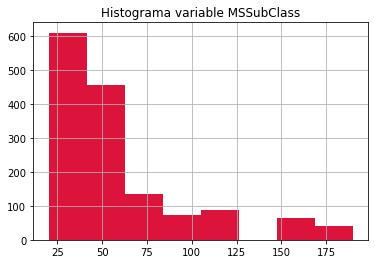

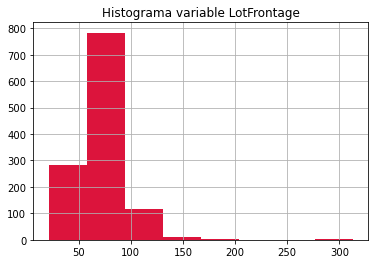

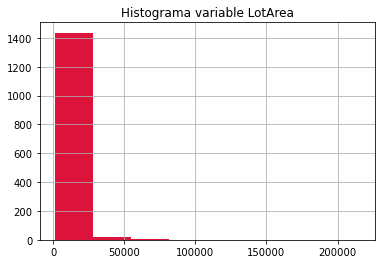

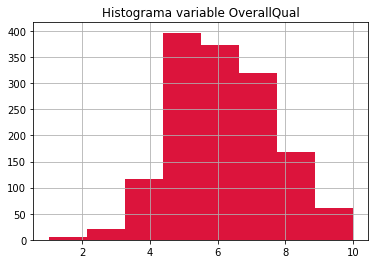

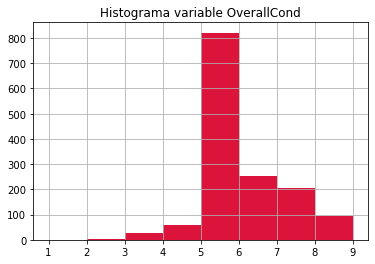

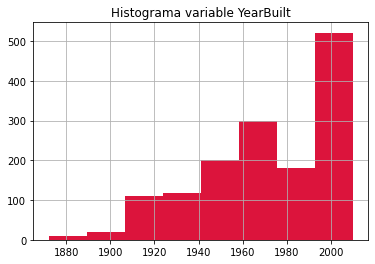

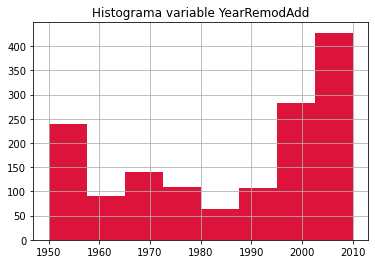

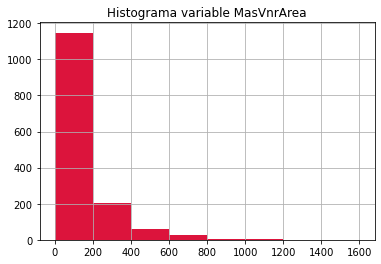

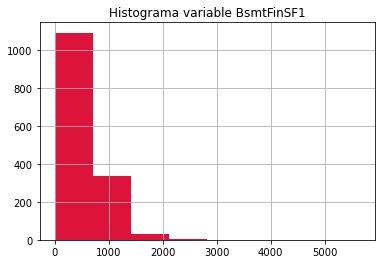

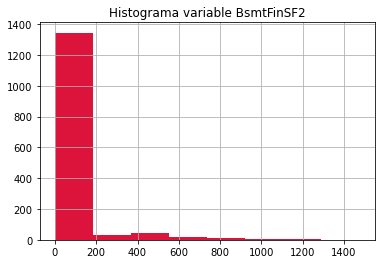

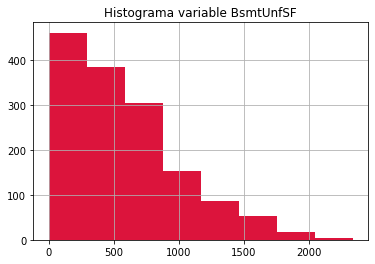

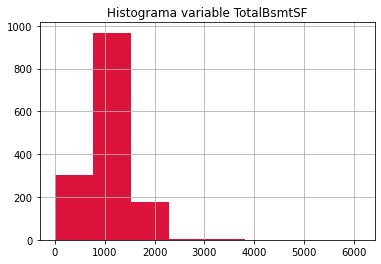

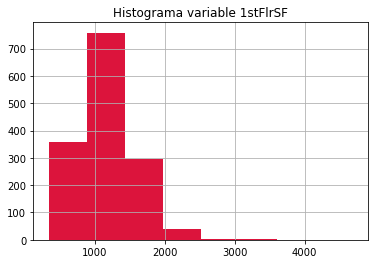

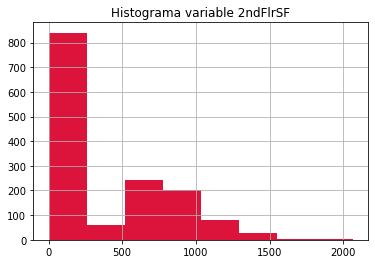

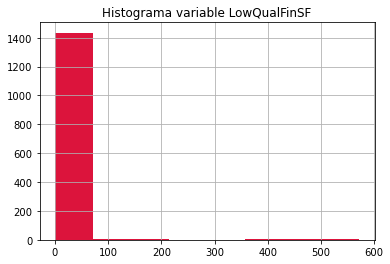

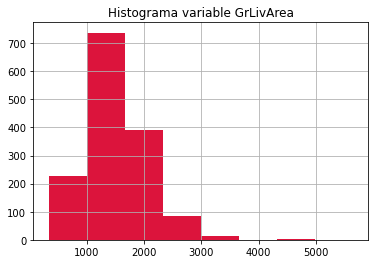

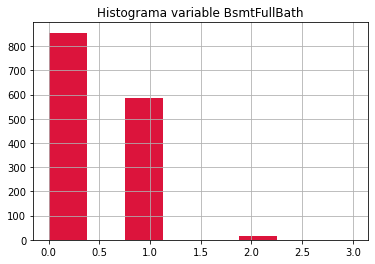

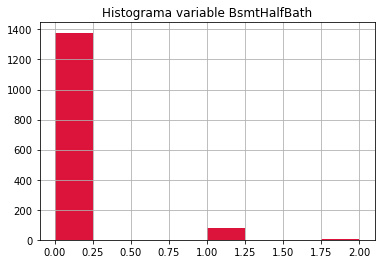

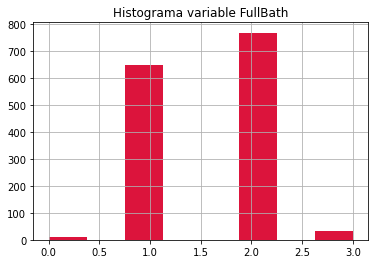

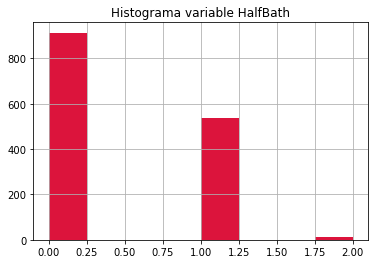

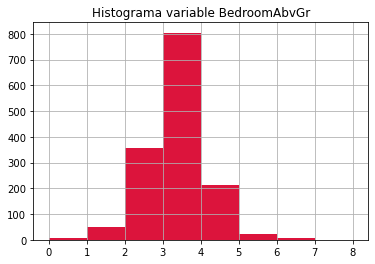

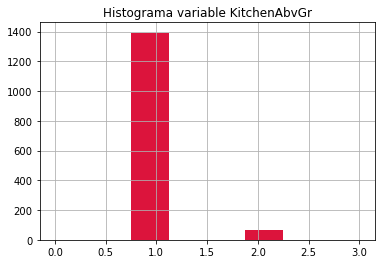

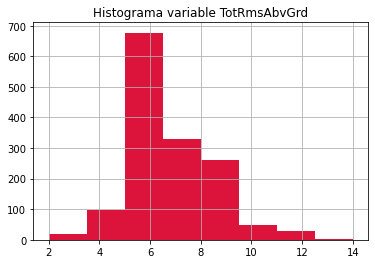

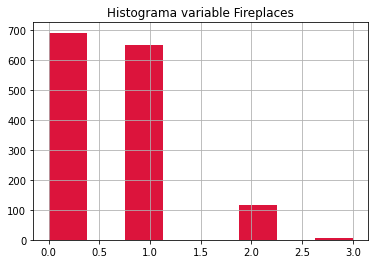

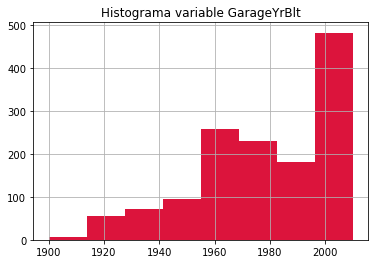

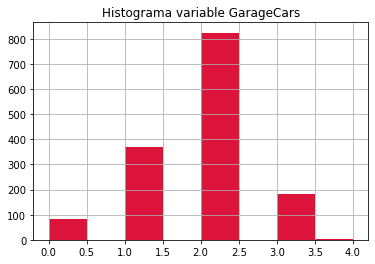

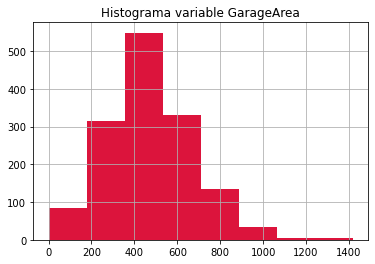

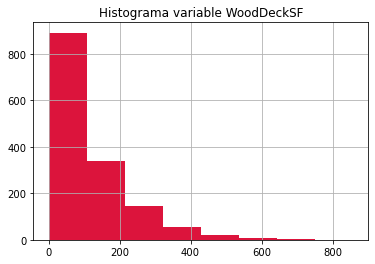

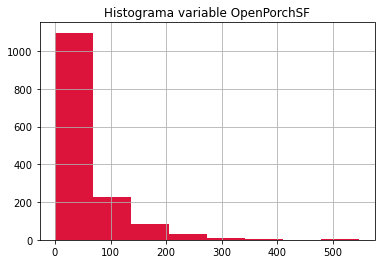

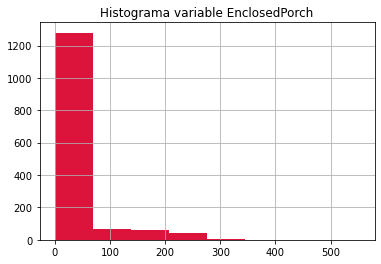

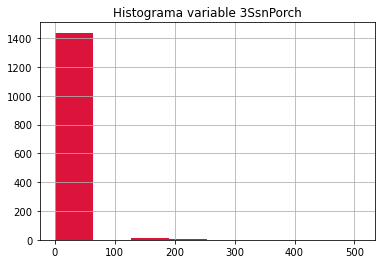

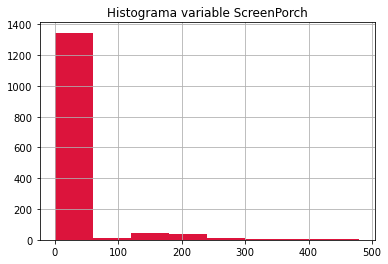

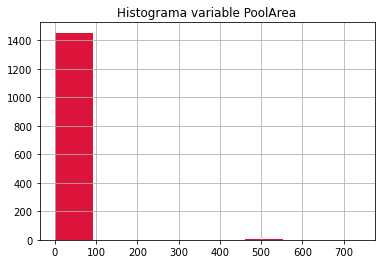

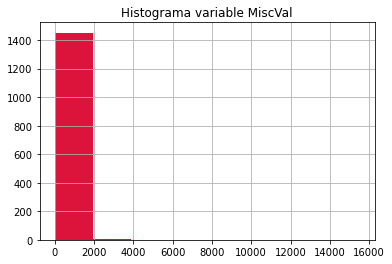

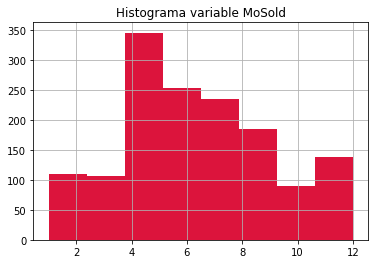

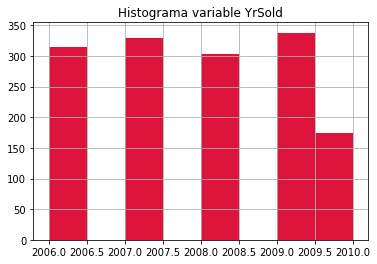

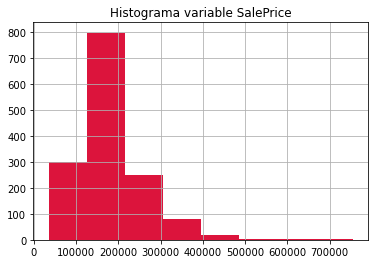

In [238]:
fig1 = plt.figure(figsize=(20,10)) 
for k in datos_cuantitativos:
    data.hist(k, bins = 8, color = "crimson")
    plt.title("Histograma variable " + str(k))


#### Podemos observar que algunas variables numéricas se comportan como variables categoricas por lo que se puede proceder aa eliminarlas para las pruebas a realizar posteriormente. Esto es con la finalidad de evitar el sesgo de los datos, con esto podremos obtener mejores resultaados. Además, podemos observar que la mayoría de histogramas presentan sesgos hacia la izquierda o hacia al derecha, por lo que se recomienda hacer varias corridas de las pruebas para alcanzar una que sea válida.

### Pruebas

- Seleccionas los valores numéricos para analizar la correlación entre los datos

In [239]:
datos_pca = data[datos_cuantitativos]
datos_pca

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0         706           0  ...           0   
1             1976         0.0         978           0  ...         298   
2             2002       162.0         486           0  ...           0   
3             1970         0.0         216           0  ...           0   
4             2000       350.0         655           0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0           0           0  ...           0   
1456          1988       119.0         790         163  ...         349   
1457          2006         0.0         275           0  ...           0   
1458          1996         0.0          49        1029  ...         366   
1459          1965         0.0         830         290  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 37 columns]

### Revisamos que no existan valores nulos, si los hay procedemos a limpiarlos.

In [240]:
pca_nulos = datos_pca.isnull().sum().to_frame()
pca_nulos

0
MSSubClass       0
LotFrontage    259
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     81
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0

In [241]:
pca_na = datos_pca.isna().sum().to_frame()
pca_na

0
MSSubClass       0
LotFrontage    259
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     81
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0

### Desplegamos nuevamente una matriz de correlación para ver las variables que tienen correlación 0. Dichas variables deben ser eliminadas.

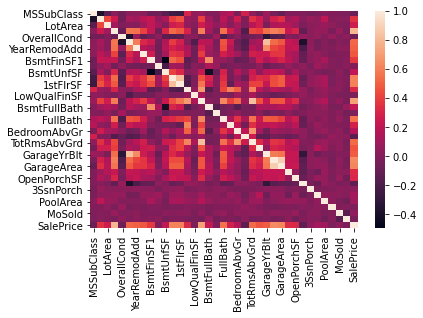

In [242]:
sns.heatmap(datos_pca.corr())

### Variables eliminadas

- "PoolArea" 
- "3SsnPorch"
- "MoSold" 
- "ScreenPorch" 
- "OpenPorchSF"
- "EnclosedPorch" 
- "MiscVal" 
- "BsmtFinSF2"
- "WoodDeckSF" 
- "OverallCond" 
- "HalfBath" 
- "YrSold" 
- "GarageYrBlt"
- "YearRemodAdd"
- "YearBuilt"
- "BsmtHalfBath" 
- "BsmtFullBath" 
- "LowQualFinSF" 
- "MasVnrArea" 
- "LotFrontage"

Estas variables fueron elimidas por tener un coeficiente de corelación de0, l ocual tendrá implicaciones significativas sobre el dataset a la hora de hacer las pruebas de esfericidad de Barllet, la $\chi^2$ y la prueba de KMO

In [243]:
data_final = datos_pca.drop(columns = ["PoolArea", "3SsnPorch", "MoSold", "ScreenPorch", "OpenPorchSF", "EnclosedPorch", "MiscVal", "BsmtFinSF2",
                                      "WoodDeckSF", "OverallCond", "HalfBath", "YrSold", "GarageYrBlt", "YearRemodAdd", "YearBuilt", "BsmtHalfBath", "BsmtFullBath",
                                      "LowQualFinSF", "MasVnrArea", "LotFrontage"])

In [244]:
data_final #mostramos la data con la que trabajeremos

MSSubClass  LotArea  OverallQual  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0             60     8450            7         706        150          856   
1             20     9600            6         978        284         1262   
2             60    11250            7         486        434          920   
3             70     9550            7         216        540          756   
4             60    14260            8         655        490         1145   
...          ...      ...          ...         ...        ...          ...   
1455          60     7917            6           0        953          953   
1456          20    13175            6         790        589         1542   
1457          70     9042            7         275        877         1152   
1458          20     9717            5          49          0         1078   
1459          20     9937            5         830        136         1256   

      1stFlrSF  2ndFlrSF  GrLivArea  FullBath  BedroomAbvGr  KitchenAbvGr  \
0          856       854       1710         2             3             1   
1         1262         0       1262         2             3             1   
2          920       866       1786         2             3             1   
3          961       756       1717         1             3             1   
4         1145      1053       2198         2             4             1   
...        ...       ...        ...       ...           ...           ...   
1455       953       694       1647         2             3             1   
1456      2073         0       2073         2             3             1   
1457      1188      1152       2340         2             4             1   
1458      1078         0       1078         1             2             1   
1459      1256         0       1256         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  SalePrice  
0                8           0           2         548     208500  
1                6           1           2         460     181500  
2                6           1           2         608     223500  
3                7           1           3         642     140000  
4                9           1           3         836     250000  
...            ...         ...         ...         ...        ...  
1455             7           1           2         460     175000  
1456             7           2           2         500     210000  
1457             9           2           1         252     266500  
1458             5           0           1         240     142125  
1459             6           0           1         276     147500  

[1460 rows x 17 columns]

In [245]:
data_final.dtypes

MSSubClass      int64
LotArea         int64
OverallQual     int64
BsmtFinSF1      int64
BsmtUnfSF       int64
TotalBsmtSF     int64
1stFlrSF        int64
2ndFlrSF        int64
GrLivArea       int64
FullBath        int64
BedroomAbvGr    int64
KitchenAbvGr    int64
TotRmsAbvGrd    int64
Fireplaces      int64
GarageCars      int64
GarageArea      int64
SalePrice       int64
dtype: object

### Luego de la limpieza obtenemos esta matriz de correlación

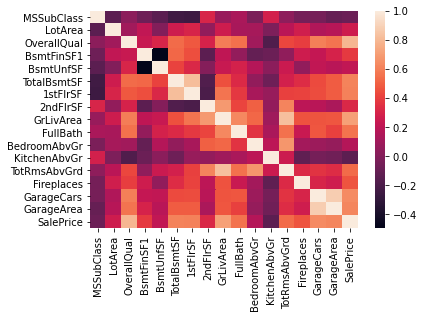

In [246]:
sns.heatmap(data_final.corr())

#### Podemos observar que son pocas las variables que tienen correlación cero, por lo que se espera que los algoritmos converjan.

In [247]:
np.linalg.det(np.array(data_final.corr())) #Calculamos el determinante, vemos que es pequeño :o 

7.31570603020266e-08

In [248]:
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_final)
chi_square_value, p_value

(23882.448043075692, 0.0)

#### Podemos observar que si es válido hacer un análisis de factores dada la pruebas de chi cuadrado y la prueba del valor p :D.

In [249]:
kmo_all,kmo_model=calculate_kmo(data_final)
kmo_model

0.7247625945369006

#### Podemos observar que si es válido hacer un PCA dada la prueba KMO 10/10

In [250]:
# Hacemos el análisis de factores con 8 factores
fa = FactorAnalyzer(n_factors = 8, rotation="varimax")
fa.fit(data_final)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([6.17244280e+00, 2.61317506e+00, 1.55515992e+00, 1.37110772e+00,
       1.17036985e+00, 8.67149802e-01, 8.05924386e-01, 6.18076189e-01,
       4.52620710e-01, 3.99584853e-01, 2.89717240e-01, 2.36234714e-01,
       1.55614865e-01, 1.46178369e-01, 1.02659349e-01, 4.03794185e-02,
       3.60475887e-03])

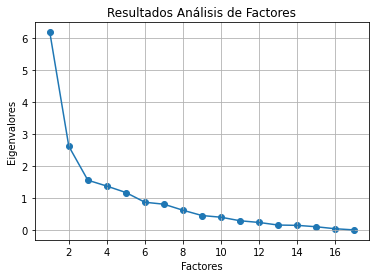

In [251]:
plt.scatter(range(1,data_final.shape[1]+1),ev)
plt.plot(range(1,data_final.shape[1]+1),ev)
plt.title('Resultados Análisis de Factores')
plt.xlabel('Factores')
plt.ylabel('Eigenvalores')
plt.grid()
plt.show()

In [252]:
fa.loadings_

array([[ 0.04690629, -0.02803027, -0.1098893 , -0.11886128, -0.06795309,
         0.07522058,  0.67850896,  0.2217428 ],
       [ 0.11189792,  0.08631312,  0.11615699,  0.38888279, -0.06650707,
        -0.03800526, -0.11505301, -0.00523085],
       [ 0.21308496,  0.44000823,  0.26674056,  0.17530607,  0.10728588,
         0.69168373,  0.13488189, -0.2443296 ],
       [-0.06957524,  0.16339159,  0.58282045,  0.24050379, -0.72172251,
         0.08209586, -0.02483521, -0.03917994],
       [ 0.12455071,  0.1293406 ,  0.24230224, -0.00247661,  0.91411404,
         0.11536564, -0.09678993,  0.01670225],
       [ 0.02660948,  0.28258337,  0.83022427,  0.32091732,  0.14652974,
         0.18756215, -0.16333708, -0.01290624],
       [ 0.06276868,  0.27599687,  0.55782955,  0.54018323,  0.09128692,
         0.27860899, -0.27291353,  0.26583526],
       [ 0.80953878,  0.10731313, -0.2057859 ,  0.0729494 , -0.00985549,
        -0.0069173 ,  0.47294707, -0.25312624],
       [ 0.71388425,  0.2795611 

In [253]:
fa.get_factor_variance()

(array([2.86911613, 2.5046676 , 1.77330693, 1.48214561, 1.4444844 ,
        1.12970999, 0.94022619, 0.80478969]),
 array([0.16877154, 0.14733339, 0.10431217, 0.08718504, 0.08496967,
        0.06645353, 0.05530742, 0.04734057]),
 array([0.16877154, 0.31610493, 0.4204171 , 0.50760213, 0.5925718 ,
        0.65902533, 0.71433276, 0.76167333]))

In [254]:
factores = list(range(1, len(fa.get_factor_variance()[2]) + 1))
factores

[1, 2, 3, 4, 5, 6, 7, 8]

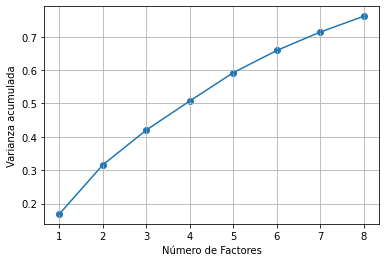

In [255]:
plt.scatter(factores, fa.get_factor_variance()[2])
plt.plot(factores, fa.get_factor_variance()[2])
plt.xlabel('Número de Factores')
plt.ylabel('Varianza acumulada')
plt.grid()

In [256]:
print("Varianza acumulada: ", fa.get_factor_variance()[2])

Varianza acumulada:  [0.16877154 0.31610493 0.4204171  0.50760213 0.5925718  0.65902533
 0.71433276 0.76167333]


#### Podemos observar que con 8 factores es posible representar el 76% de los datos por lo que es viable hacer una análisis de factores.

In [257]:
data_final_norm = (data_final - data_final.mean())/data_final.std() #Normalizamos la data para el PCA 

In [258]:
pca = PCA(n_components = 9) # Solo 9 componentes
model = pca.fit_transform(data_final_norm)

In [259]:
pca.components_

array([[-2.65714332e-02,  1.32931201e-01,  3.16012158e-01,
         1.40040753e-01,  1.37112099e-01,  2.81090450e-01,
         2.93692468e-01,  1.60560330e-01,  3.49774101e-01,
         2.80431122e-01,  1.54274691e-01,  8.22980652e-04,
         2.92304986e-01,  2.17725338e-01,  2.92843665e-01,
         2.89580656e-01,  3.53632456e-01],
       [ 2.78515562e-01, -9.23526432e-02, -5.45563420e-02,
        -3.24260546e-01,  5.09812276e-02, -3.08606110e-01,
        -2.54082784e-01,  4.70673442e-01,  2.11673959e-01,
         1.86251337e-01,  3.77324674e-01,  2.39095292e-01,
         3.15713768e-01, -6.79783494e-02, -9.99649707e-02,
        -1.47658627e-01, -8.19890795e-02],
       [ 2.79064695e-01,  1.42336052e-01, -1.83121677e-02,
         5.15512695e-01, -7.03207054e-01, -1.52275765e-01,
        -1.26668154e-01,  2.14831920e-01,  8.41314934e-02,
        -5.82920670e-02, -6.36543003e-02, -2.69191317e-02,
        -6.33712947e-03,  1.86888019e-01, -1.46853045e-02,
         4.42688153e-04,  7.3

In [260]:
df_pca = pd.DataFrame(pca.components_)
df_pca

0         1         2         3         4         5         6  \
0 -0.026571  0.132931  0.316012  0.140041  0.137112  0.281090  0.293692   
1  0.278516 -0.092353 -0.054556 -0.324261  0.050981 -0.308606 -0.254083   
2  0.279065  0.142336 -0.018312  0.515513 -0.703207 -0.152276 -0.126668   
3 -0.272654  0.383793 -0.310612  0.172769 -0.039263  0.179382  0.294843   
4  0.442774 -0.211406 -0.045149  0.151442 -0.000861  0.139572  0.187543   
5 -0.415379  0.145739 -0.226305  0.019595 -0.213182 -0.186483 -0.117539   
6  0.255847  0.772181 -0.067461 -0.291630  0.148311 -0.135002 -0.085393   
7  0.151422  0.360872  0.171200  0.140659  0.036033  0.171302 -0.044553   
8  0.361818  0.019516 -0.047082  0.054813  0.195892  0.252796  0.015780   

          7         8         9        10        11        12        13  \
0  0.160560  0.349774  0.280431  0.154275  0.000823  0.292305  0.217725   
1  0.470673  0.211674  0.186251  0.377325  0.239095  0.315714 -0.067978   
2  0.214832  0.084131 -0.058292 -0.063654 -0.026919 -0.006337  0.186888   
3 -0.149069  0.099821 -0.104599  0.338185  0.314213  0.210290  0.090414   
4 -0.234788 -0.060683  0.133812 -0.153585  0.688960 -0.021620 -0.262379   
5  0.012708 -0.080528 -0.047981  0.245518  0.096884  0.077844 -0.432745   
6 -0.007959 -0.073420 -0.003201 -0.250394  0.142206 -0.135965  0.221838   
7  0.057792  0.019508  0.288862  0.002608 -0.254006 -0.086195 -0.714820   
8  0.138509  0.138548 -0.777538  0.139202 -0.158957  0.115996 -0.166642   

         14        15        16  
0  0.292844  0.289581  0.353632  
1 -0.099965 -0.147659 -0.081989  
2 -0.014685  0.000443  0.073846  
3 -0.349176 -0.291575 -0.125776  
4  0.121276  0.125056 -0.070764  
5  0.411399  0.462261 -0.075554  
6  0.165578  0.123447 -0.049268  
7 -0.214832 -0.185667  0.120044  
8  0.045570  0.163326 -0.058233

### Los coeficientes principales están representando las variables más importantes relacionadas con el resto de varaibles que fueron aboservidas con el fin de reducir la cantidad utilizada.

In [261]:
componentes = list(range(1, len(pca.explained_variance_ratio_) + 1))

In [262]:
pca.explained_variance_ratio_

array([0.36308487, 0.15371618, 0.09148   , 0.0806534 , 0.06884529,
       0.05100881, 0.04740732, 0.03635742, 0.02662475])

In [263]:
pca.explained_variance_

array([6.1724428 , 2.61317506, 1.55515992, 1.37110772, 1.17036985,
       0.8671498 , 0.80592439, 0.61807619, 0.45262071])

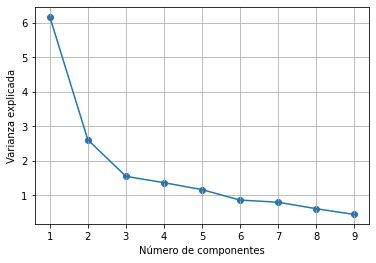

In [264]:
plt.scatter(componentes,pca.explained_variance_)
plt.plot(componentes, pca.explained_variance_)
plt.xlabel('Número de componentes' )
plt.ylabel('Varianza explicada')
plt.grid()

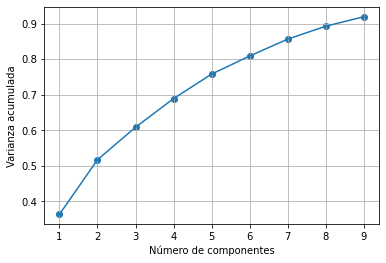

In [265]:
plt.scatter(componentes, np.cumsum(pca.explained_variance_ratio_))
plt.plot(componentes, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

### Podemos observar que los datos del PCA se comportan de manera similar a los de análisis de factores, pero en el PCA podemos explicar con 9 componentes más del 90% de los datos, por lo que es viable

### Reglas de Asignación


In [266]:
data_cualitativa = data[data.columns[~data.columns.isin(datos_cuantitativos )]]

In [267]:
data_cualitativa

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0         CollgCr       Norm  ...     Attchd          RFn         TA   
1         Veenker      Feedr  ...     Attchd          RFn         TA   
2         CollgCr       Norm  ...     Attchd          RFn         TA   
3         Crawfor       Norm  ...     Detchd          Unf         TA   
4         NoRidge       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1455      Gilbert       Norm  ...     Attchd          RFn         TA   
1456       NWAmes       Norm  ...     Attchd          Unf         TA   
1457      Crawfor       Norm  ...     Attchd          RFn         TA   
1458        NAmes       Norm  ...     Attchd          Unf         TA   
1459      Edwards       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1460 rows x 43 columns]

In [268]:
data_cualitativa.groupby("GarageQual").count()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  \
GarageQual                                                              
Ex                 3       3      0         3            3          3   
Fa                48      48     10        48           48         48   
Gd                14      14      2        14           14         14   
Po                 3       3      1         3            3          3   
TA              1311    1311     69      1311         1311       1311   

            LotConfig  LandSlope  Neighborhood  Condition1  ...  FireplaceQu  \
GarageQual                                                  ...                
Ex                  3          3             3           3  ...            2   
Fa                 48         48            48          48  ...           16   
Gd                 14         14            14          14  ...           13   
Po                  3          3             3           3  ...            0   
TA               1311       1311          1311        1311  ...          730   

            GarageType  GarageFinish  GarageCond  PavedDrive  PoolQC  Fence  \
GarageQual                                                                    
Ex                   3             3           3           3       0      1   
Fa                  48            48          48          48       0     10   
Gd                  14            14          14          14       1      3   
Po                   3             3           3           3       0      1   
TA                1311          1311        1311        1311       6    250   

            MiscFeature  SaleType  SaleCondition  
GarageQual                                        
Ex                    1         3              3  
Fa                    4        48             48  
Gd                    0        14             14  
Po                    0         3              3  
TA                   46      1311           1311  

[5 rows x 42 columns]

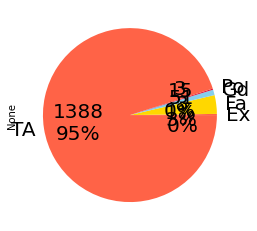

In [269]:
def label_function(val):
    return f'{val / 100 * len(data_cualitativa):.0f}\n{val:.0f}%'
data_cualitativa.groupby('GarageQual').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue', "crimson"])

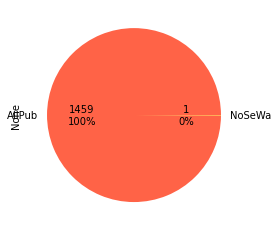

In [270]:
data_cualitativa.groupby('Utilities').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['tomato', 'gold', 'skyblue', "crimson"])

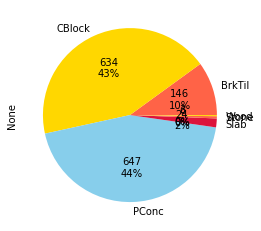

In [271]:
data_cualitativa.groupby('Foundation').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['tomato', 'gold', 'skyblue', "crimson"])

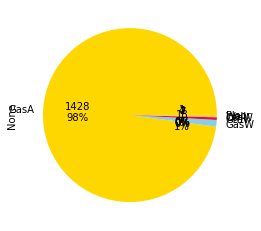

In [272]:
data_cualitativa.groupby('Heating').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['tomato', 'gold', 'skyblue', "crimson"])

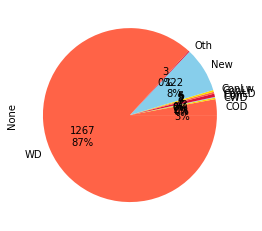

In [273]:
data_cualitativa.groupby('SaleType').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['tomato', 'gold', 'skyblue', "crimson"])

#### Podemos ver que en los gráficos de pie tenemos datos que ocasionaran overfitting por lo que procederemos a removerlos en su mayoría, por lo tanto se quitarán las siguientes variables por dicha razón: 

### Variables a Remover

- "GarageCond"
- "Fence"
- "PoolQC"
- "GarageQual"
- "KitchenQual"
- "Condition1"
- "LandSlope"
- "MiscFeature"
- "FireplaceQu"
- "HeatingQC"
- "LandContour"
- "Alley"
- "Condition2"
- "BsmtCond"
- "BsmtQual"
- "BsmtFinType2"
- "BsmtFinType1"
- "ExterQual"
- "ExterCond"
- "GarageFinish"
- "Exterior1st"
- "Exterior2nd"
- "BldgType"
- "LotShape"
- "HouseStyle"
- "RoofMatl"
- "BsmtExposure"
- "MasVnrType"
- "GarageType"
- "CentralAir"
- "MSZoning"
- "PavedDrive"
- "RoofStyle"
- "LotConfig"
- "Street"
- "Utilities"
- "Heating"

In [274]:
data_priori = data_cualitativa.drop(columns = ["GarageCond", "Fence", "PoolQC", "GarageQual", "KitchenQual", "Condition1", "LandSlope", "MiscFeature",
                                              "FireplaceQu", "HeatingQC", "LandContour", "Alley", "Condition2", "BsmtCond", "BsmtQual", "BsmtFinType2",
                                              "BsmtFinType1", "ExterQual", "ExterCond", "GarageFinish", "Exterior1st", "Exterior2nd", "BldgType",
                                              "LotShape", "HouseStyle", "RoofMatl", "BsmtExposure", "MasVnrType", "GarageType", "CentralAir", "MSZoning",
                                              "PavedDrive", "RoofStyle", "LotConfig", "Street", "Utilities", "Heating"])
data_priori

Neighborhood Foundation Electrical Functional SaleType SaleCondition
0         CollgCr      PConc      SBrkr        Typ       WD        Normal
1         Veenker     CBlock      SBrkr        Typ       WD        Normal
2         CollgCr      PConc      SBrkr        Typ       WD        Normal
3         Crawfor     BrkTil      SBrkr        Typ       WD       Abnorml
4         NoRidge      PConc      SBrkr        Typ       WD        Normal
...           ...        ...        ...        ...      ...           ...
1455      Gilbert      PConc      SBrkr        Typ       WD        Normal
1456       NWAmes     CBlock      SBrkr       Min1       WD        Normal
1457      Crawfor      Stone      SBrkr        Typ       WD        Normal
1458        NAmes     CBlock      FuseA        Typ       WD        Normal
1459      Edwards     CBlock      SBrkr        Typ       WD        Normal

[1460 rows x 6 columns]

In [275]:
data_priori.columns

Index(['Neighborhood', 'Foundation', 'Electrical', 'Functional', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [276]:
records = []
for i in range(0, len(data_priori)):
    records.append([str(data_priori.values[i,j]) for j in range(0, 6)])

In [277]:
association_rules = apriori(records)
association_results = list(association_rules)

In [278]:
for i in range(0, 5):
    print(association_results[5*i],  "\n")

RelationRecord(items=frozenset({'BrkTil'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'BrkTil'}), confidence=0.1, lift=1.0)]) 

RelationRecord(items=frozenset({'PConc'}), support=0.44315068493150683, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'PConc'}), confidence=0.44315068493150683, lift=1.0)]) 

RelationRecord(items=frozenset({'Normal', 'CBlock'}), support=0.38082191780821917, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'CBlock', 'Normal'}), confidence=0.38082191780821917, lift=1.0), OrderedStatistic(items_base=frozenset({'CBlock'}), items_add=frozenset({'Normal'}), confidence=0.8769716088328076, lift=1.0687633964072614), OrderedStatistic(items_base=frozenset({'Normal'}), items_add=frozenset({'CBlock'}), confidence=0.46410684474123537, lift=1.0687633964072614)]) 

RelationRecord(items=frozenset({'CollgCr', 'Typ'}), support=0.10273972602739725, ordered_sta

### Podemos ver que algunas palabras si tienen un suporte alto, pero en general el soporte no es mayor a 0.5. Por lo que no es recomedable hacer este tipo de asosiaciones por que no se obtendran buenos resultados.

# Conclusiones

- Es posible efectuar una análisis de factores con dado que las pruebas de hipótesis de chi cuadrado y el valor p lo permiten. Se pueden obtener bueno resultados.

- Es posible hacer un PCA, dado que la prueba de KMO es válida, además, se obtienen buenos resultados al ahcerlo.

- No es recomendable hacer reglas de asosiación porque no se obtienen buenos resultados con la data.